In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('auto-mpg.csv')

# Display the first few rows of the dataframe
print(df.head())

# Check the data types of each column
print(df.dtypes)


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                   car name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [2]:
# Checking and Fix Column Data Types
# Convert 'origin' to a categorical column
df['origin'] = df['origin'].astype('category')

# Check for any other data type issues (e.g., missing values or non-numeric entries in numeric columns)
print(df.info())

# Check for unique values in the categorical column 'origin'
print(df['origin'].unique())

# Check if there are any missing values in the dataset
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    int64   
 7   origin        398 non-null    category
 8   car name      398 non-null    object  
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 25.5+ KB
None
[1, 3, 2]
Categories (3, int64): [1, 2, 3]
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [3]:
# Split the Data We will split the data into 75% training and 25% testing.

from sklearn.model_selection import train_test_split

# Split the data
train_df, test_df = train_test_split(df, test_size=0.25, random_state=42)

print(f'Training data shape: {train_df.shape}')
print(f'Testing data shape: {test_df.shape}')


Training data shape: (298, 9)
Testing data shape: (100, 9)


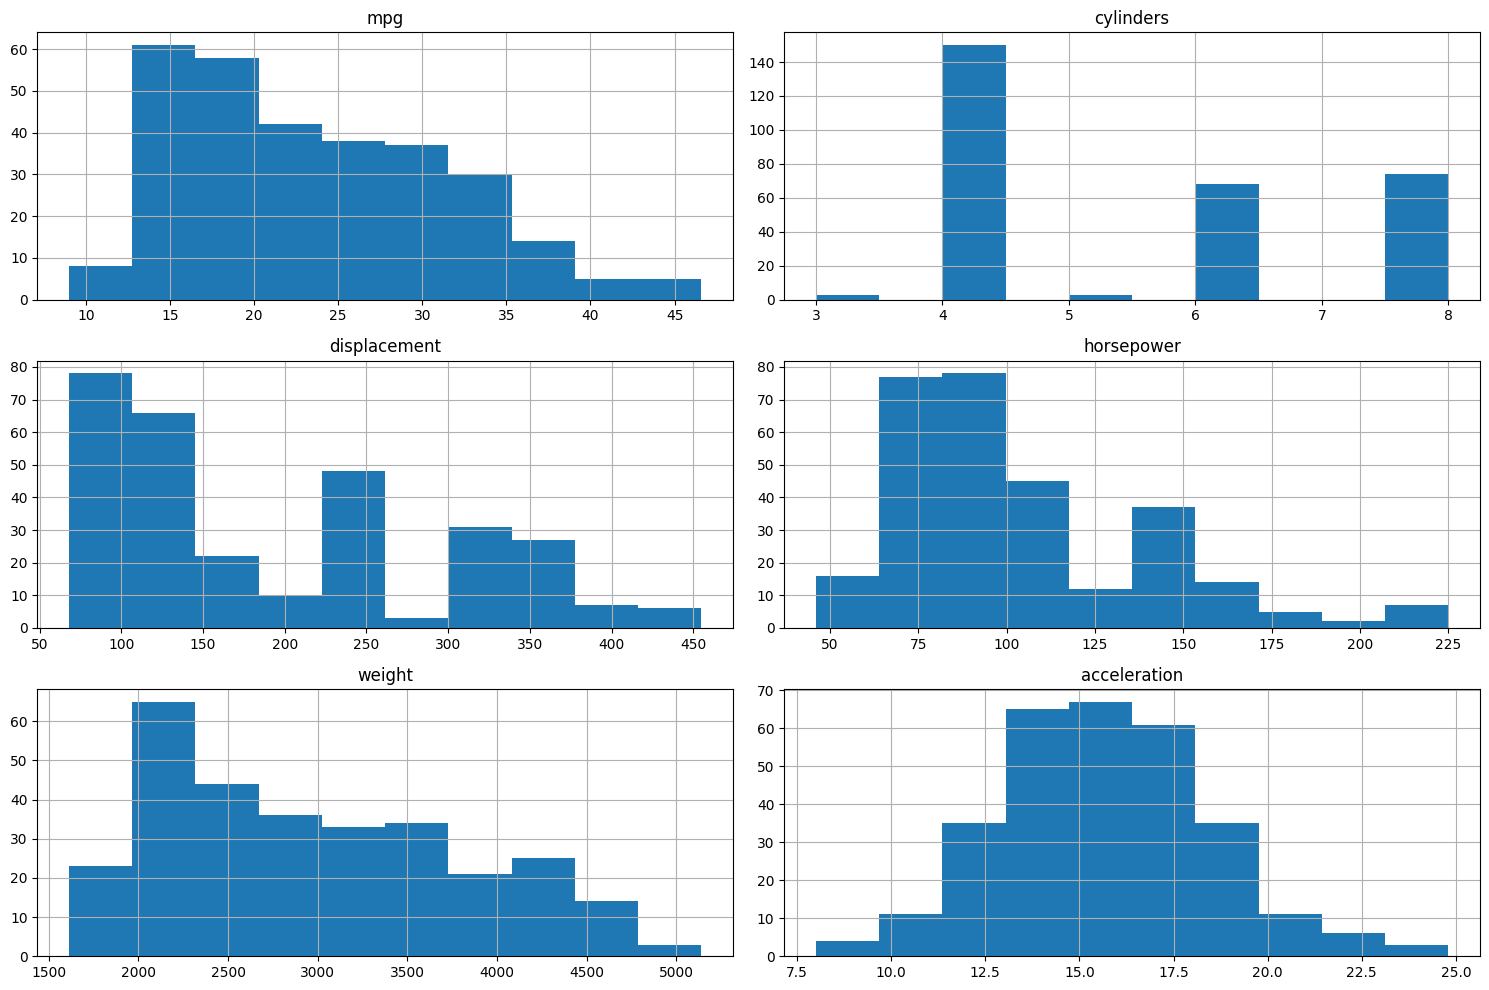

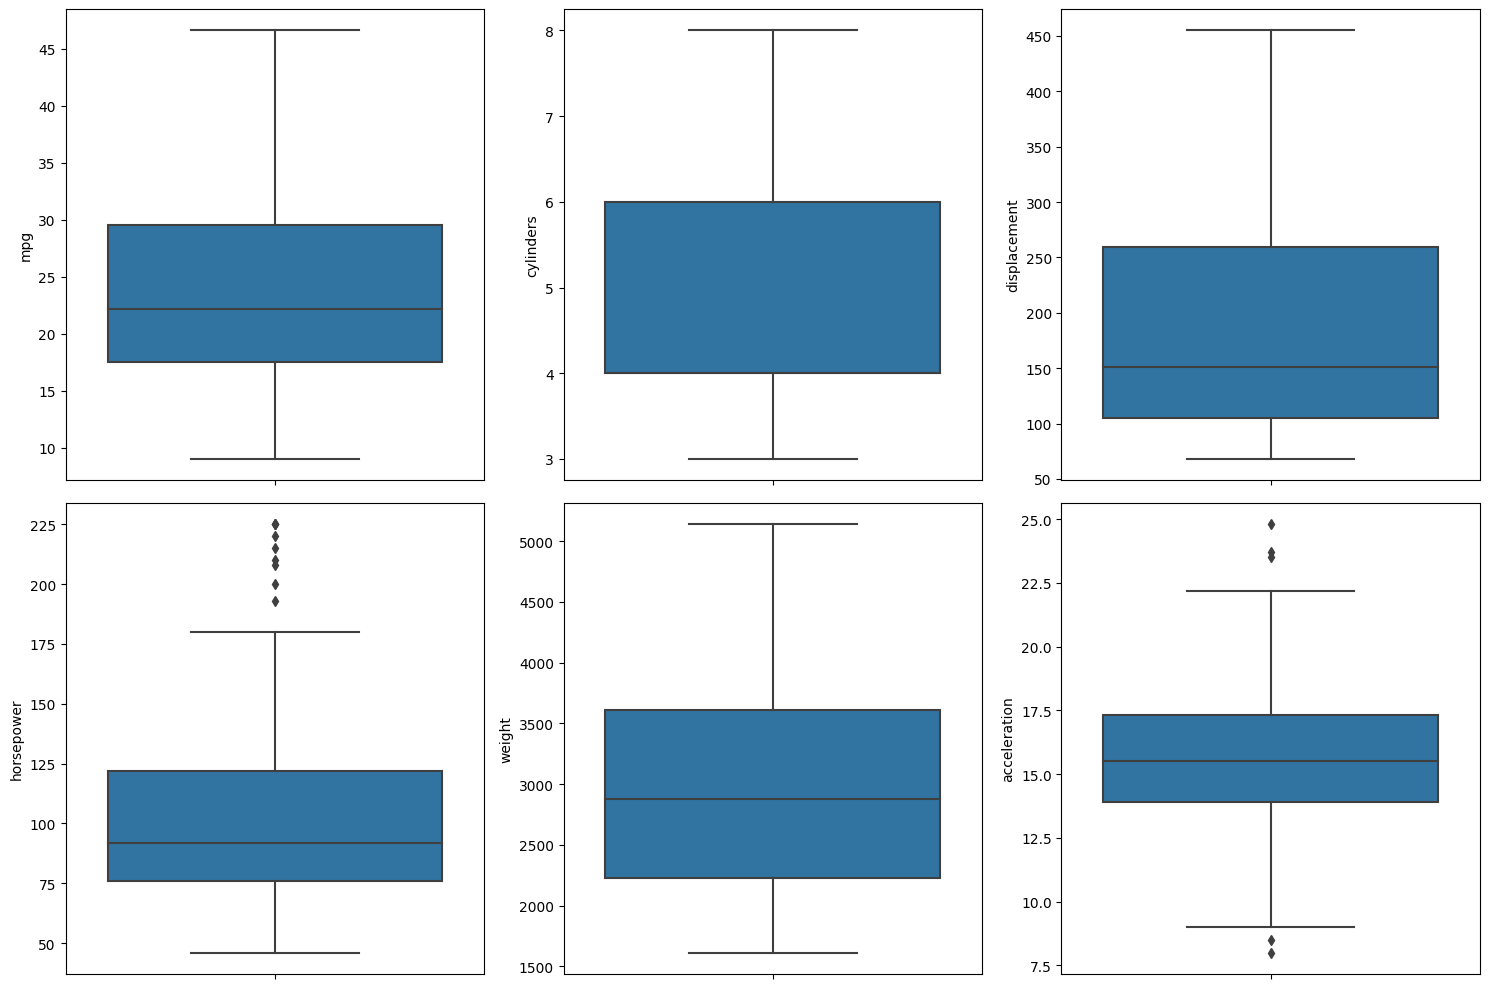

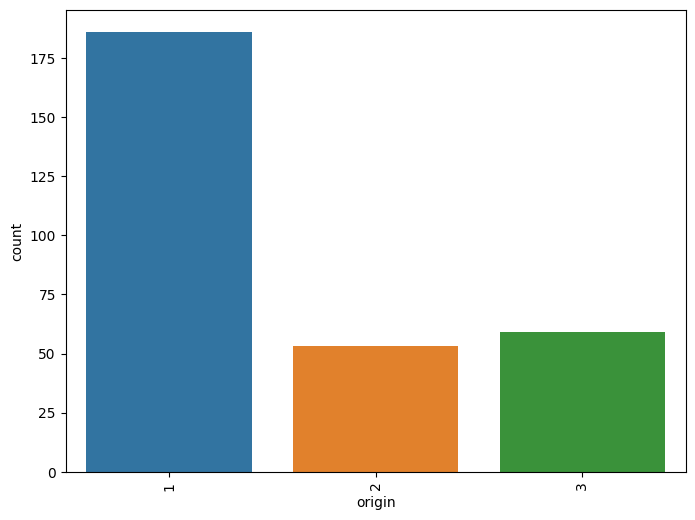

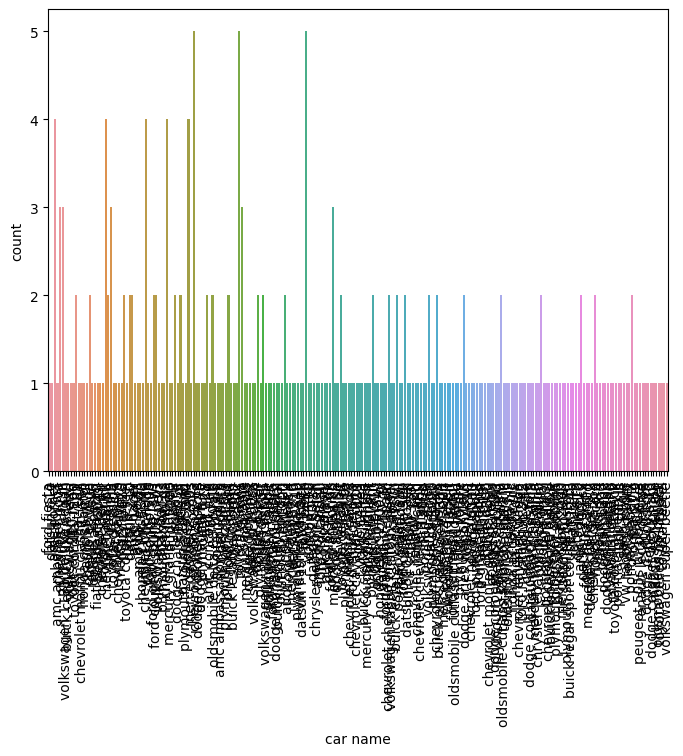

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns
numeric_columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

# Plot histograms for numeric columns
train_df[numeric_columns].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Plot boxplots for numeric columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=train_df, y=column)
plt.tight_layout()
plt.show()

# Categorical columns
categorical_columns = ['origin', 'car name']

# Visualize categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train_df, x=column)
    plt.xticks(rotation=90)
    plt.show()


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
import numpy as np

# Define pipelines for each type of column
numeric_symmetric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

numeric_skewed_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer([
    ('num_sym', numeric_symmetric_pipeline, ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']),
    ('num_skew', numeric_skewed_pipeline, ['cylinders']),
    ('cat', categorical_pipeline, ['origin', 'car name'])
])

# Fit the pipeline on the training data
preprocessor.fit(train_df)

# Transform the training and testing data
train_processed = preprocessor.transform(train_df)
test_processed = preprocessor.transform(test_df)

print(f'Processed training data shape: {train_processed.shape}')
print(f'Processed testing data shape: {test_processed.shape}')


Processed training data shape: (298, 241)
Processed testing data shape: (100, 241)
